In [1]:
pip install pyodbc pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pyodbc

# Define connection parameters
server = 'DESKTOP-UFKKV4B\\SQLEXPRESS'  # Use the server name from your screenshot
database = 'TicketSalesDB'              # Replace this with your actual database name

# Establish connection
conn = pyodbc.connect(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};"
    f"DATABASE={database};"
    "Trusted_Connection=yes;"
)

# Test connection by printing a message
print("Connection successful!")


Connection successful!


In [4]:
import pyodbc
import pandas as pd  # Add this line to import pandas

In [5]:
# Query to retrieve data
query = "SELECT * FROM events"

# Load data into a DataFrame
df = pd.read_sql(query, conn)

# Display the first few rows
print(df.head())


   event_id    event_name     location  sales_date  ticket_price  tickets_sold
0         1     Rock Fest      Chicago  2024-10-01         150.0           200
1         2    Jazz Night     New York  2024-10-02          80.0           150
2         3     Rock Fest      Chicago  2024-10-03         150.0           220
3         4  EDM Festival  Los Angeles  2024-10-04         120.0           300


C:\Users\mlope\AppData\Local\Temp\ipykernel_1352\1592192590.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Example 1: Calculate Total Revenue per Event

In [6]:
df['total_revenue'] = df['ticket_price'] * df['tickets_sold']
event_revenue = df.groupby('event_name')['total_revenue'].sum().reset_index()
print(event_revenue)


     event_name  total_revenue
0  EDM Festival        36000.0
1    Jazz Night        12000.0
2     Rock Fest        63000.0


Example 2: Plot Total Tickets Sold by Location
You can use matplotlib or seaborn for visualization:

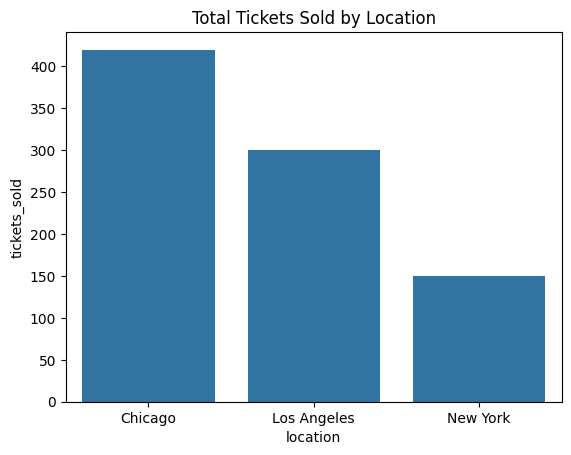

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

location_sales = df.groupby('location')['tickets_sold'].sum().reset_index()

# Plot
sns.barplot(x='location', y='tickets_sold', data=location_sales)
plt.title('Total Tickets Sold by Location')
plt.show()


Example 3: Predictive Modeling (Optional)

If you’re interested in predictive modeling, you can use scikit-learn to build a simple model to predict tickets sold based on ticket price. Here’s an example of a linear regression model:

In [9]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/11.0 MB 6.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/11.0 MB 9.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.0 MB 11.0 MB/s eta 0:00:01
   ------- -------------------------------- 2.2/11.0 MB 11.5 MB/s eta 0:00:01
   ---------- ----------------------------- 2.8/11.0 MB 11.8 MB/s eta 0:00:01
   ------------ --------------------------- 3.4/11.0 MB 12.1 MB/s eta 0:00:01
   -------------- ------------------------- 4.0/11.0 MB 12.2 MB/s eta 0:00:01
   ---------------- ----------------------- 4.6/11.0 MB 12.2 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.0 MB 12.3 MB/s eta 0:00:01
   --------------------- ------------------ 5.8/11.0 MB 12.4 MB/s eta 0:00:01
   ----------------------- ---------------- 6.4/11.0 MB 12.8 MB/s eta 0:00:01
   ------------------------- -------------- 7.0/11.0 MB 12.8 MB/s eta 0:00


[notice] A new release of pip is available: 24.0 -> 24.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target
X = df[['ticket_price']]
y = df['tickets_sold']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 72900.0


Step 5: Closing the Connection
When you’re done, don’t forget to close the connection to the database:

In [11]:
conn.close()


**Summary of the Workflow**

Establish a connection to SQL Server using pyodbc.

Load data into a DataFrame with pd.read_sql().

Analyze and visualize the data using Pandas and Matplotlib/Seaborn.

Optionally, build predictive models using Scikit-Learn.

Close the connection after you’re done.

These steps will allow you to connect to SQL Server, query data, and analyze it in Python, covering many essential tasks you might need for a Data Analyst role at Reps & Co. Let me know if you need more details on any part!